# 2주차 미션

In [1]:
# 2주차 미션 문제풀이에 필요한 데이터 불러오기
# 데이터 사이즈 확인
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/medical_201909.csv.zip", low_memory=False)
df.shape

(91335, 39)

In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [3]:
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats


# Window의 한글 폰트 설정
plt.rc('font', family="NanumBarunGothic")
plt.rcParams['axes.unicode_minus'] =False

# Mac의 한글 폰트 설정
# plt.rc('font', family="AppleGothic")
# plt.rc('axes', unicode_minus=False)

# 그래프가 노트북 안에 보이게 하기 위해
%matplotlib inline


from IPython.display import set_matplotlib_formats

# 폰트가 선명하게 보이기 위해
set_matplotlib_formats("retina")

<ipython-input-3-3cbdceaae982>:20: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats("retina")


# 문제 1
## 전국 시도별 약국수를 구해주세요!

- 상권업종소분류명이 약국인 것을 찾아 빈도수를 구해주세요.
- 이 때, **value_counts, groupby, pivot_table** 등 다양한 집계 방법을 통해 구해볼 수 있습니다. 각자 구하기 편한 방법을 통해 빈도수를 구합니다.

In [4]:
# 전국 약국 데이터 저장
df_medi = df[df['상권업종소분류명'] == '약국']
print(df_medi.shape)
df_medi.head(2)

(18964, 39)


,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
4,20364049,더블유스토어수지점,수지점,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,4146510100107120002026238,NaN,경기도 용인시 수지구 문정로 32,448170.0,16837.0,NaN,1,NaN,127.095522,37.323528
10,21057519,민생약국,NaN,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,4889046030200780002048274,NaN,경상남도 합천군 용주면 월평길 149-35,678912.0,50212.0,NaN,NaN,NaN,128.118615,35.575962


## value_counts

In [5]:
# value_counts로 전국 시도별 약국 수 구하기
df_medi.value_counts('시도명')

,count
시도명,
경기도,4510
서울특별시,3579
부산광역시,1130
경상남도,1017
인천광역시,1002
경상북도,915
대구광역시,870
전라북도,862
충청남도,830


## groupby

In [6]:
# groupby로 전국 시도별 약국 수 구하기
df_medi.groupby('시도명').size().sort_values(ascending=False)

,0
시도명,
경기도,4510
서울특별시,3579
부산광역시,1130
경상남도,1017
인천광역시,1002
경상북도,915
대구광역시,870
전라북도,862
충청남도,830


## pivot_table

In [7]:
# pivot_table로 전국 시도별 약국 수 구하기
pd.pivot_table(df_medi, index='시도명', aggfunc='size').sort_values(ascending=False)

,0
시도명,
경기도,4510
서울특별시,3579
부산광역시,1130
경상남도,1017
인천광역시,1002
경상북도,915
대구광역시,870
전라북도,862
충청남도,830


# 문제 2
- 여러분은 반려동물과 관련된 사업을 하는 스타트업에 취업을 하여 상권분석을 해달라는 요청을 받았습니다.
- 병원이나 약국은 인구나 유동인구가 많은 지역에 주로 위치하고 있습니다.
- 그렇다면 **동물병원도 병원이나 약국이 많은 곳에 더 많이** 있을까요?

- **빈도수**를 구하고 **시각화** 하여 동물병원이 어느 지역에 많은지 분석해 주세요!

In [8]:
df['상권업종소분류명'].unique()

array(['산부인과', '내과/외과', '신경외과', '기타병원', '약국', '동물병원', '한약방', '탕제원',
       '정형/성형외과', '소아과', '이비인후과의원', '노인/치매병원', '언어치료', '수의업-종합', '한의원',
       '치과의원', '침구원', '일반병원', '안과의원', '조산원', '한방병원', '종합병원', '유사의료업기타',
       '응급구조대', '혈액원', '치과병원', '척추교정치료', '피부과', '비뇨기과', '치과기공소', '산후조리원',
       '접골원', '수의업-기타', '제대혈'], dtype=object)

In [9]:
# 동물병원
vet = df[df['상권업종소분류명'] == '동물병원']['시도명'].value_counts()
vet

,count
시도명,
경기도,992
서울특별시,557
인천광역시,193
경상북도,165
경상남도,161
부산광역시,153
충청남도,131
대구광역시,119
전라북도,111


In [10]:
# 약국
medi = df[df['상권업종소분류명'] == '약국']['시도명'].value_counts().copy()
medi

,count
시도명,
경기도,4510
서울특별시,3579
부산광역시,1130
경상남도,1017
인천광역시,1002
경상북도,915
대구광역시,870
전라북도,862
충청남도,830


In [11]:
# 병원
hosp = df[df['상권업종중분류명'] == '병원']['시도명'].value_counts().copy()
hosp

,count
시도명,
경기도,14101
서울특별시,13406
부산광역시,4601
경상남도,3218
인천광역시,3159
대구광역시,3119
경상북도,2603
전라북도,2497
충청남도,2165


In [19]:
# 동물병원, 약국, 병원 데이터를 합치기
df_merged = pd.DataFrame({
    '동물병원': vet,
    '약국': medi,
    '병원': hosp
})
df_merged.sort_values('병원', ascending=False)

,동물병원,약국,병원
시도명,,,
경기도,992,4510,14101
서울특별시,557,3579,13406
부산광역시,153,1130,4601
경상남도,161,1017,3218
인천광역시,193,1002,3159
대구광역시,119,870,3119
경상북도,165,915,2603
전라북도,111,862,2497
충청남도,131,830,2165


In [13]:
# 데이터 시각화를 위해 seaborn 라이브러리 불러오기
import seaborn as sns
import matplotlib.pyplot as plt

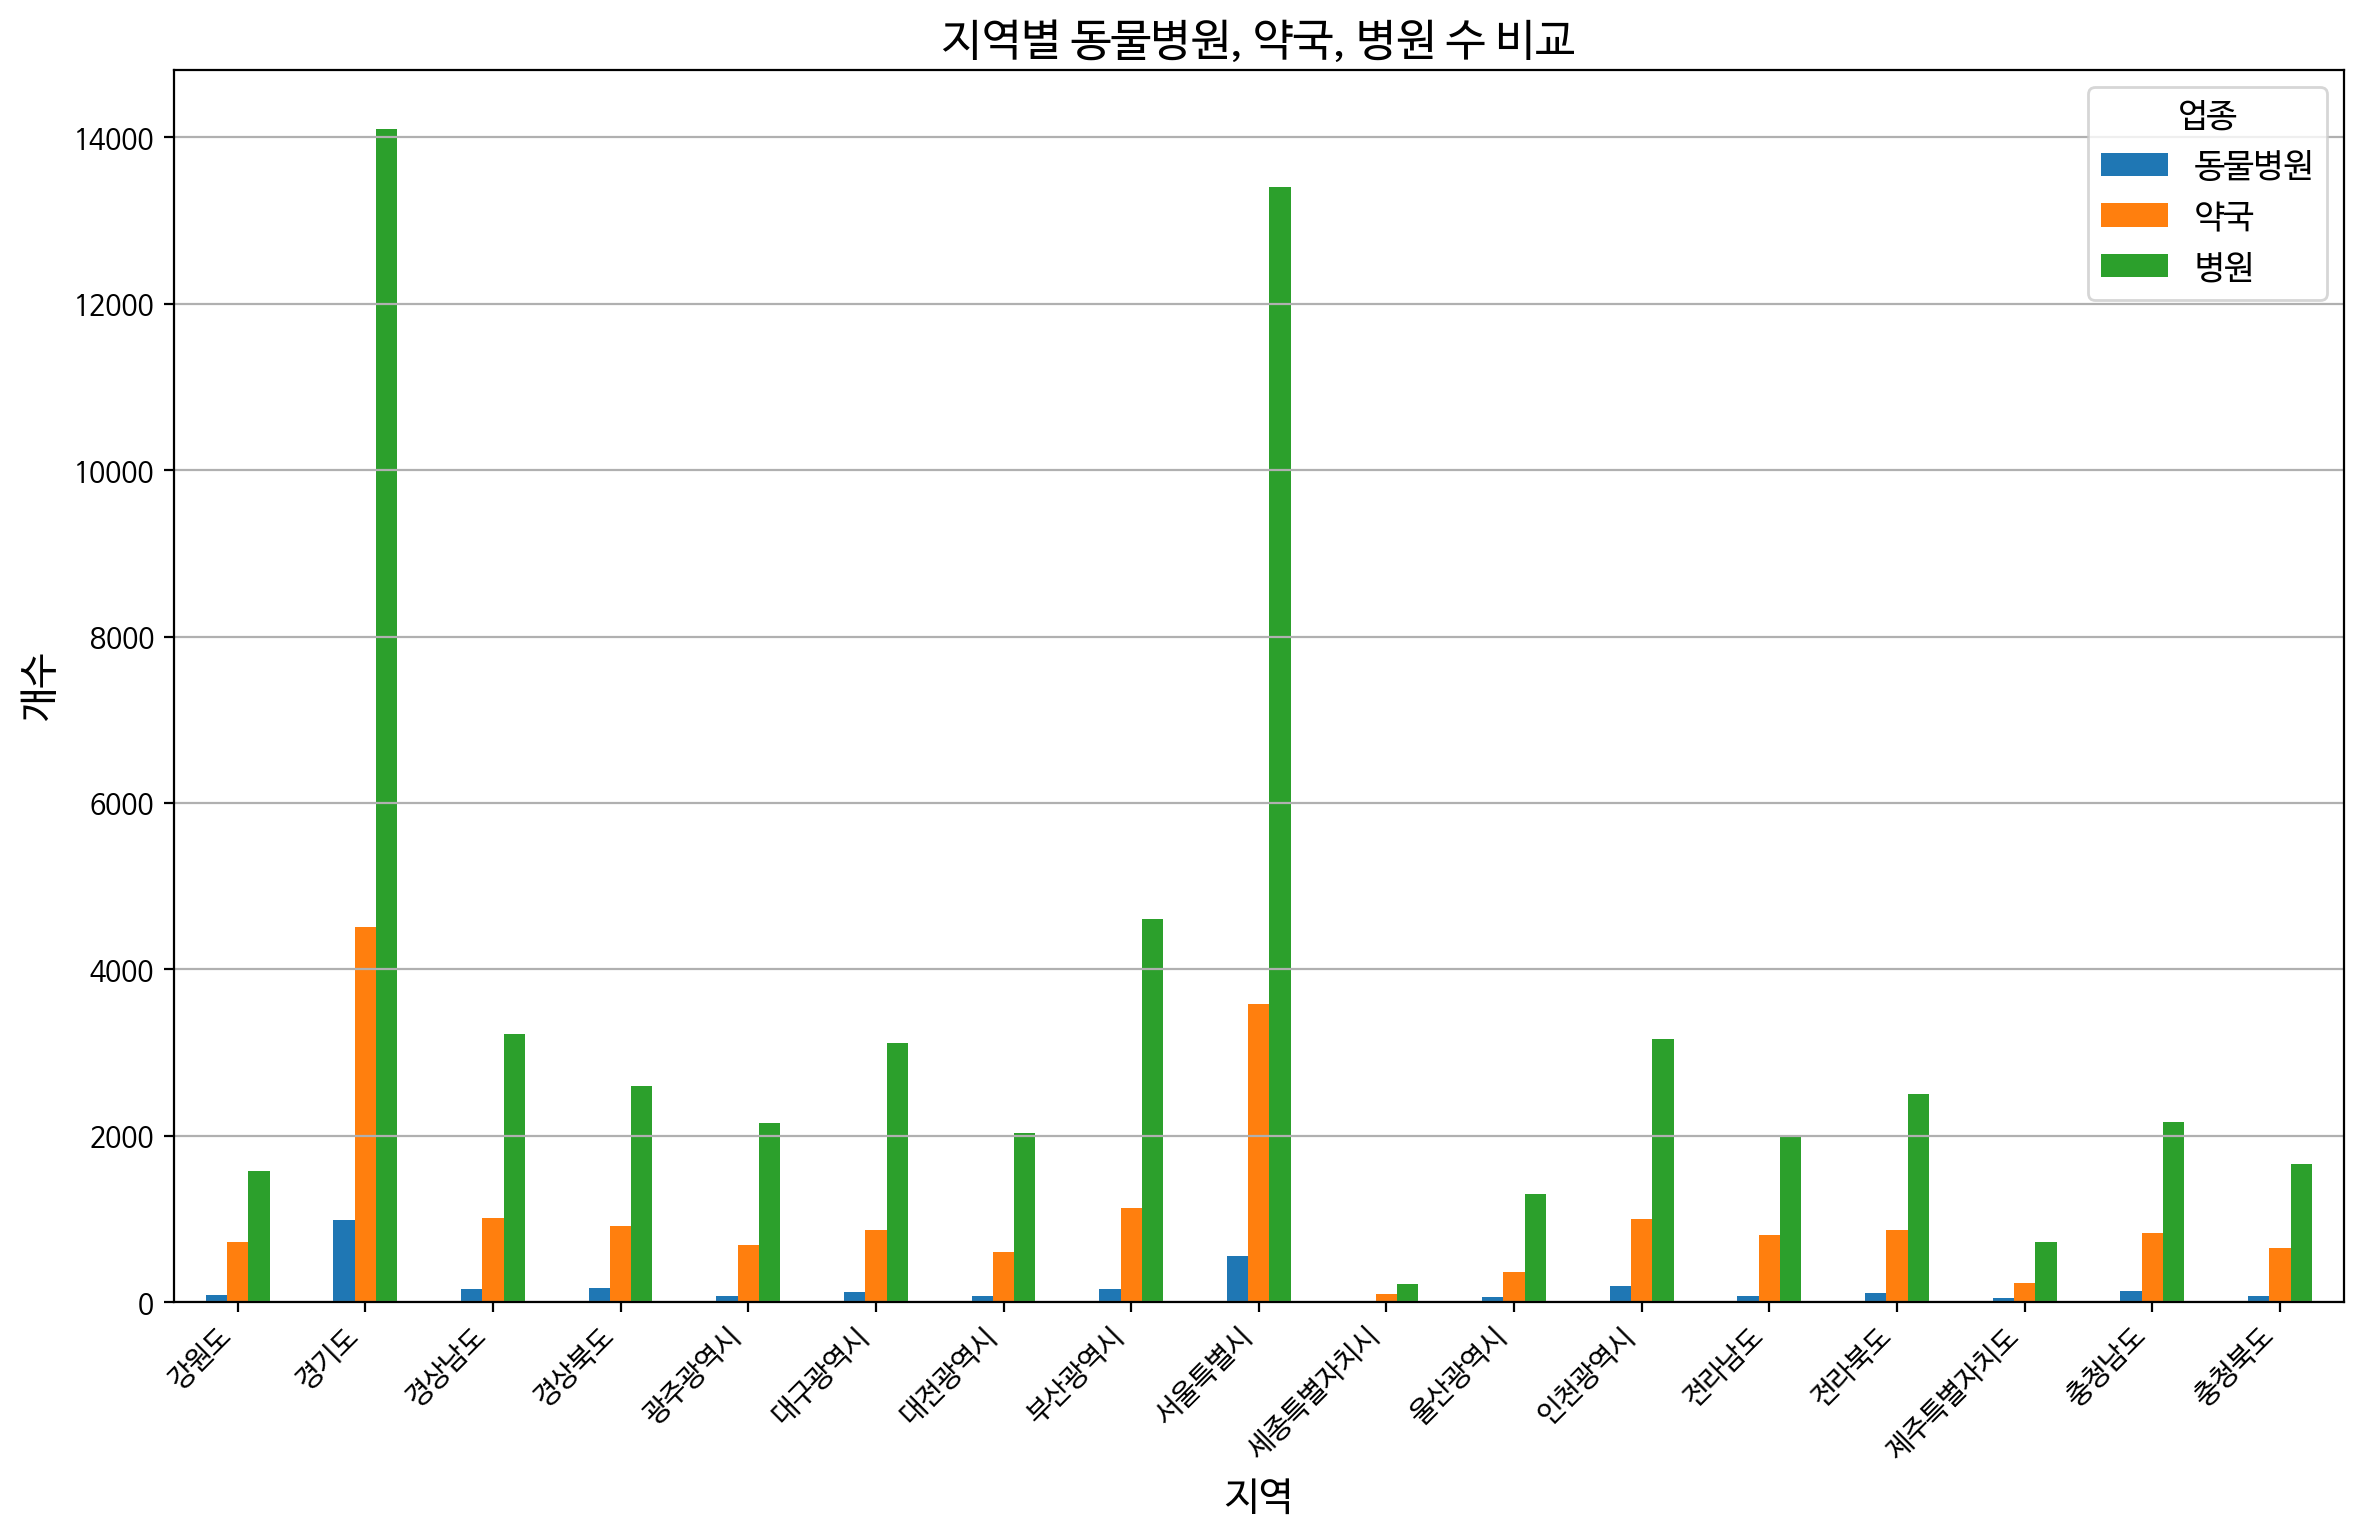

In [21]:
# 동물병원, 약국, 병원의 분포 비교
df_merged.plot.bar(figsize=(14, 8)).grid(axis='y')
plt.title('지역별 동물병원, 약국, 병원 수 비교', fontsize=16)
plt.xlabel('지역', fontsize=14)
plt.ylabel('개수', fontsize=14)
plt.legend(title='업종', title_fontsize=12, fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

# 문제 3
## 강남지역에는 피부과나 성형외과가 다른 지역에 비해 전체 병원 수 중에서 어느 정도의 비율을 차지하고 있는지

- 서울에 소재한 병원 중 상권업종소분류명에 "피부" 나 "성형"이 들어간 분류명을 찾아 구해주세요!
- **피부과 성형외과 수 / 전체병원 수** 로 비율을 구해주세요!
- 비율이 높은 순서대로 정렬되게 구해주세요!
- 수업에서 사용한 같은 CSV 파일을 사용하며 다음의 결과가 나오도록 구합니다.
- 소숫점 두 번째짜리까지 출력하는 방법은 **pandas round** 로 검색해서 사용법을 알아보세요!

In [15]:
# 서울의 피부/성형 병원
seoul_pibu_hospital = df[(df["시도명"] == "서울특별시") & (df["상권업종중분류명"] == "병원") & (df['상권업종소분류명'].str.contains("피부|성형"))]

# 서울의 병원
seoul_hospital = df[(df["시도명"] == "서울특별시") & (df["상권업종중분류명"] == "병원")]

In [16]:
# `피부과 성형외과 수 / 전체병원 수` 로 비율
ratio_seoul_pibu_hospital = seoul_pibu_hospital["시군구명"].value_counts() / seoul_hospital["시군구명"].value_counts()

# 소수점 두자리수 반올림, 내림차순 정렬
ratio_seoul_pibu_hospital.round(2).sort_values(ascending=False)

,count
시군구명,
강남구,0.24
서초구,0.17
마포구,0.09
영등포구,0.08
서대문구,0.08
강서구,0.07
강동구,0.07
중구,0.07
양천구,0.07


# 문제 4
# 지도를 시각화하여 '노인/치매병원'이 주로 어디에 위치하고 있는지를 찾아보자.
- 평균 기대수명이 점점 길어지면서 실버 의료 산업도 주목받고 있습니다. 여러분은 실버 의료 산업과 관련된 스타트업에 취업했습니다. 지도를 시각화하여 **'노인/치매병원'이 주로 어디에 위치하고 있는지**를 찾아보고자 합니다.

- **folium**을 통해 지도에 전국의 '노인/치매병원'을 표시해 주세요!
- folium 의 문서를 참고하여 다른 기능을 사용하여 좀 더 멋지게 지도를 꾸며도 좋습니다.
- folium 문서 : https://python-visualization.github.io/folium/quickstart.html



In [23]:
# '상권업종중분류명'이 '노인/치매병원'인 데이터를 elderly_hospital에 저장
elderly_hospital = df[df['상권업종소분류명'] == '노인/치매병원']
print(elderly_hospital.shape)
elderly_hospital.head(2)

(1055, 39)


,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
21,21128898,다사랑요양병원,NaN,S,의료,S01,병원,S01B17,노인/치매병원,Q86102,...,2632010300101360002000001,다사랑요양병원,부산광역시 북구 덕천로 339,616110.0,46610.0,NaN,1,NaN,129.040773,35.209154
62,21511155,노경회,NaN,S,의료,S01,병원,S01B17,노인/치매병원,Q86102,...,4623035023110240001000001,NaN,전라남도 광양시 진월면 용소길 7,545851.0,57713.0,NaN,1,NaN,127.746981,34.986585


In [24]:
# 지도 시각화를 위해 folium 라이브러리 불러오기
import folium

In [35]:
# 대한민국 위도, 경도의 평균 지도
map = folium.Map(location=[df['위도'].mean(), df['경도'].mean()], zoom_start=7.3)
map

In [48]:
# 지도에 병원 위치 표시
for n in elderly_hospital.index:
    name = elderly_hospital.loc[n, '상호명']
    address = elderly_hospital.loc[n, '도로명주소']
    popup = f"{name}-{address}"
    location = [elderly_hospital.loc[n, '위도'], elderly_hospital.loc[n, '경도']]
    folium.Marker(
        location = location,
        popup = popup,
    ).add_to(map)
map